In [ ]:
!nvidia-smi

Thu Mar  6 10:11:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tlVwr0GOfPrsPjtXP2D9")
project = rf.workspace("coc-2fz7c").project("coc-object-detection-ypfix")
version = project.version(5)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/CoC-Object-Detection-5'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=60 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 112MB/s]
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/CoC-Object-Detection-5/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,587,417 parameters, 0 gradients, 6.3 GFLOPs

image 1/57 /content/CoC-Object-Detection-5/test/images/Air_Defense6_png.rf.bfe00b8b503f0fe88cd3bd5441067915.jpg: 640x640 1 air_defense, 10.9ms
image 2/57 /content/CoC-Object-Detection-5/test/images/Air_Sweeper6_png.rf.9d15cf95b248b9daf14566116af83760.jpg: 640x640 1 air_sweeper, 8.9ms
image 3/57 /content/CoC-Object-Detection-5/test/images/Archer_Tower15Up_png.rf.004c64255327b923e753bc30561e5133.jpg: 640x640 1 archer_tower, 8.2ms
image 4/57 /content/CoC-Object-Detection-5/test/images/Archer_Tower15_png.rf.5461b573524556e4815f3171b63d7891.jpg: 640x640 1 archer_tower, 8.4ms
image 5/57 /content/CoC-Object-Detection-5/test/images/Archer_Tower17G_png.rf.af8000c37b7d7cefa98e090e4546cd76.jpg: 640x640 1 archer_tower, 8.1ms
image 6/57 /content/CoC-Object-Detection-5/test/images/Archer_Tower2_png.rf.18c35b9c5187d07c10c47fafbe75fbe8.jp

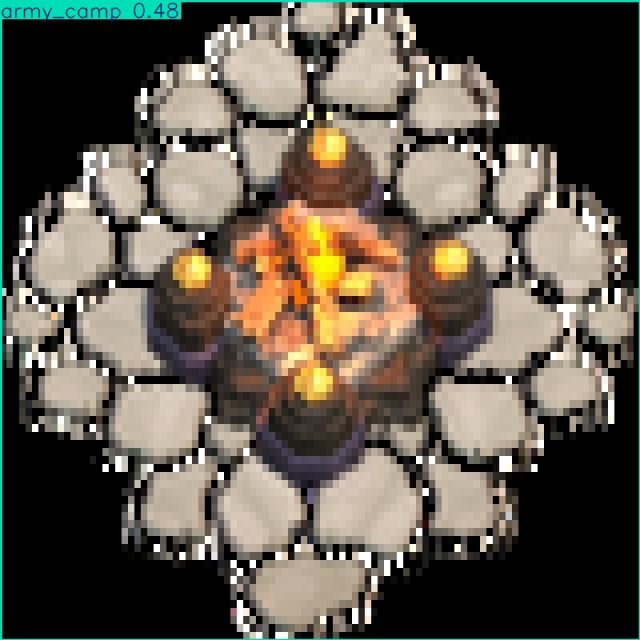

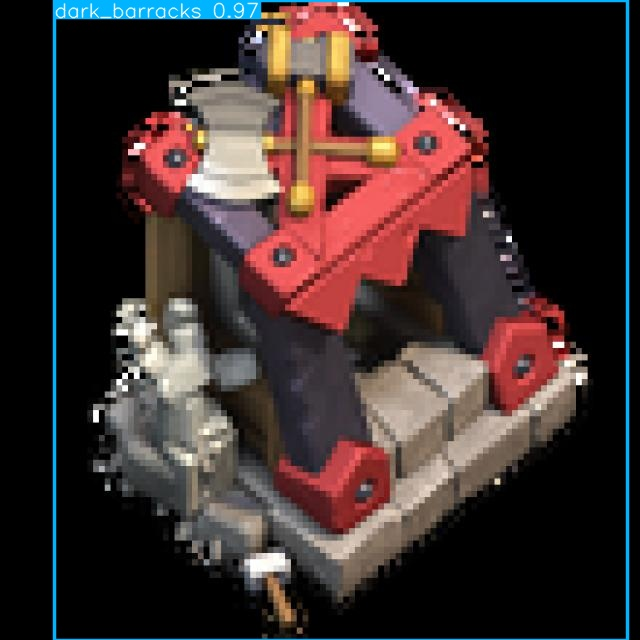

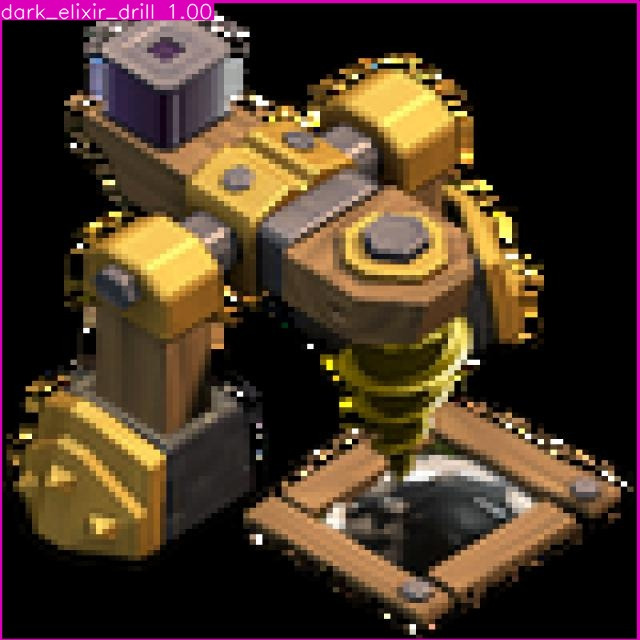

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="coc.mp4" save=True

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,587,417 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/437) /content/coc.mp4: 320x640 1 air_defense, 1 barracks, 16 cannons, 1 dark_elixir_drill, 11 gold_mines, 13 gold_storages, 2 laboratorys, 78.5ms
video 1/1 (frame 2/437) /content/coc.mp4: 320x640 1 air_defense, 16 cannons, 1 dark_elixir_drill, 10 gold_mines, 12 gold_storages, 2 laboratorys, 11.1ms
video 1/1 (frame 3/437) /content/coc.mp4: 320x640 1 air_defense, 16 cannons, 1 dark_elixir_drill, 10 gold_mines, 12 gold_storages, 2 laboratorys, 10.2ms
video 1/1 (frame 4/437) /content/coc.mp4: 320x640 1 air_defense, 16 cannons, 1 dark_elixir_drill, 11 gold_mines, 14 gold_storages, 2 laboratorys, 10.2ms
video 1/1 (frame 5/437) /content/coc.mp4: 320x640 1 archer_tower, 16 cannons, 1 elixir_collector, 12 gold_mines, 12 gold_storages, 2 laboratorys, 10.1ms
video 1/1 (frame 6/437) /content/coc.mp4: 320x640 1 arche